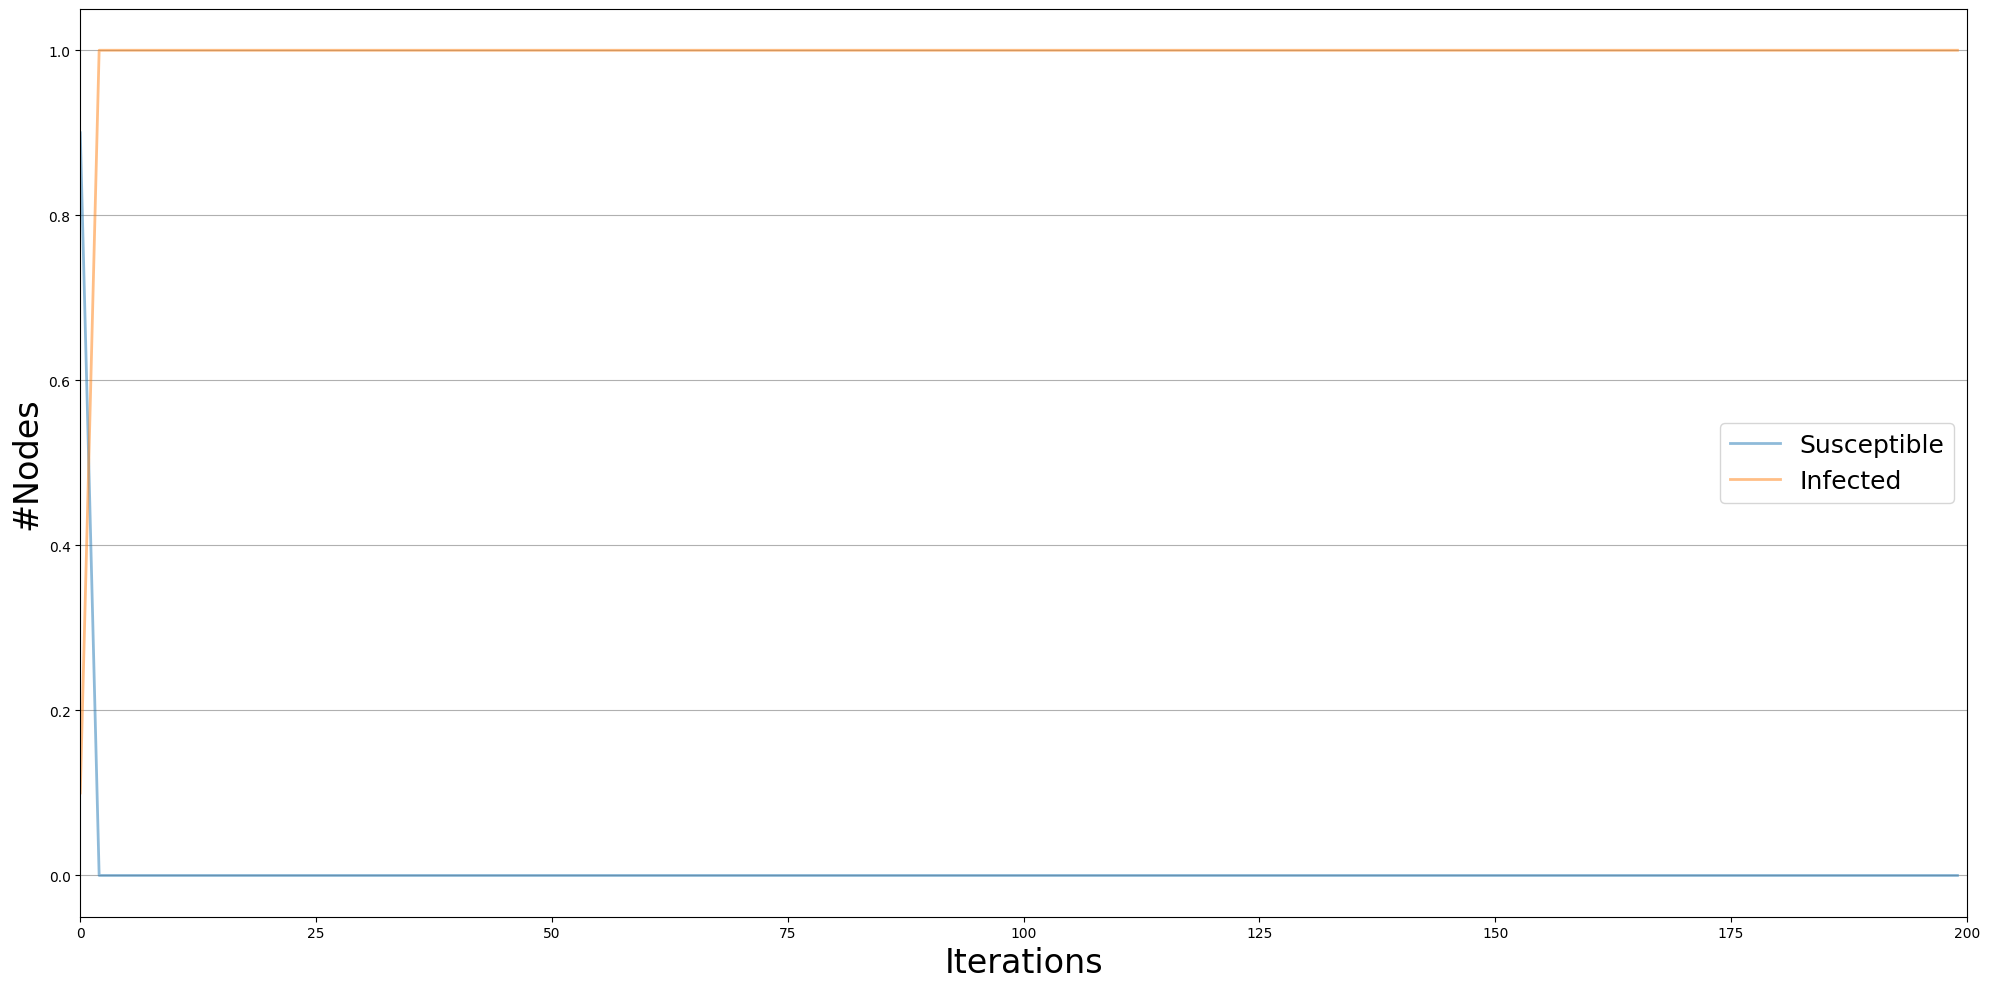

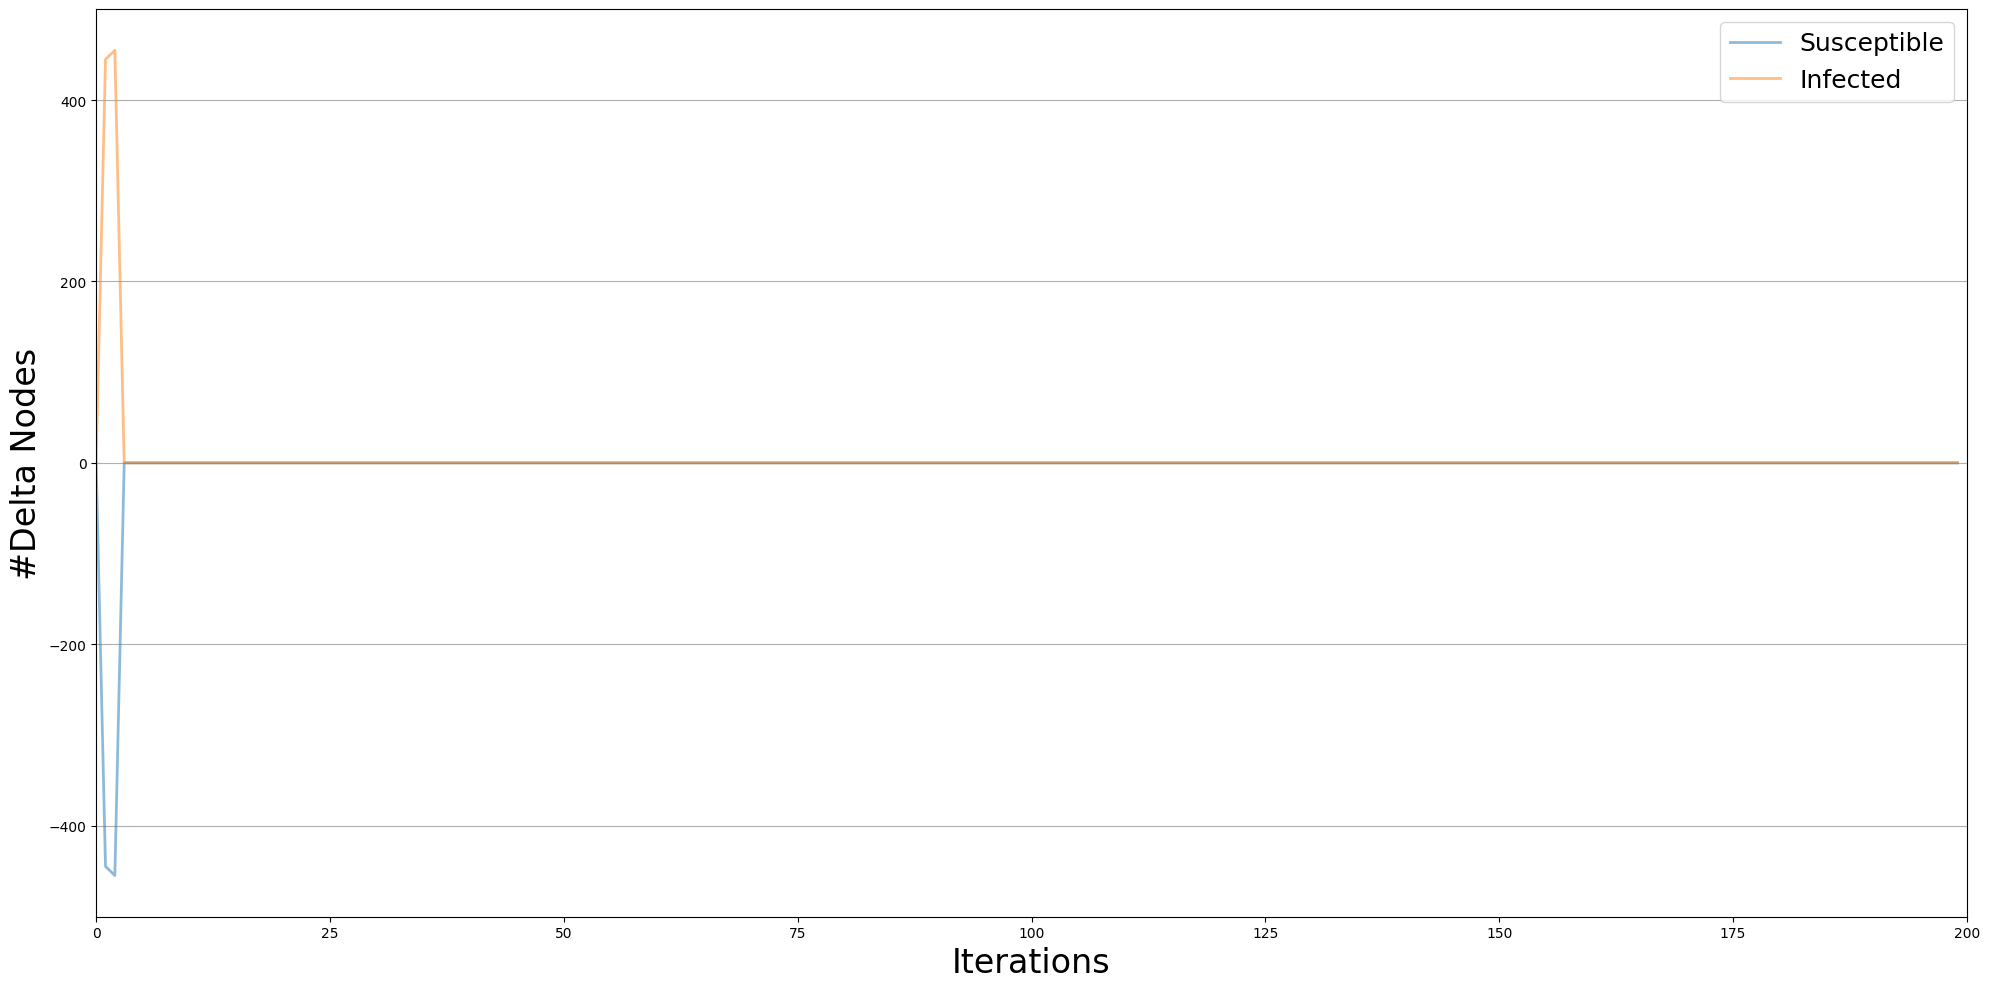

In [2]:
'''
The model works as follows: - each node has its own threshold; - during a generic iteration every node is observed: if the percentage 
of its infected neighbors is greater than its threshold it becomes infected as well.

Statuses:
    S - Susceptible | 0
    I - Infected    | 1

Parameters:
    - threshold : i
'''

import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence


# Network topology
g = nx.erdos_renyi_graph(1000, 0.1)

# Model selection
model = ep.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('fraction_infected', 0.1)

# Setting node parameters
threshold = 0.1
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

%matplotlib inline
viz = DiffusionTrend(model, trends)
viz.plot()
viz = DiffusionPrevalence(model, trends)
viz.plot()